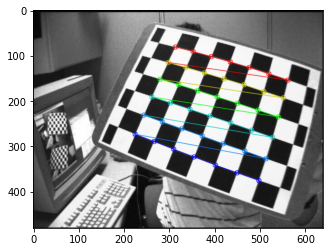

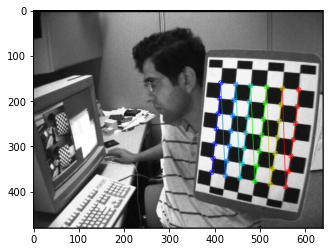

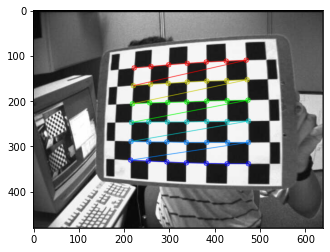

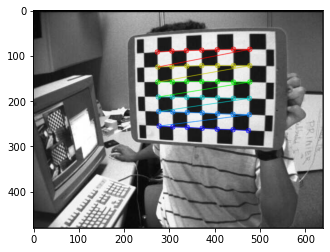

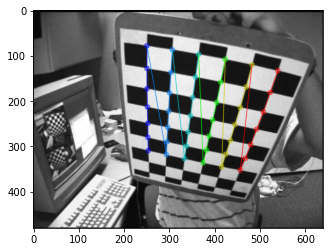

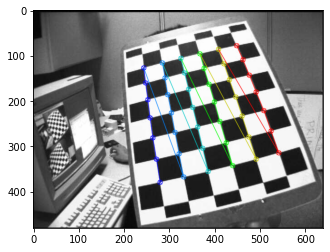

In [36]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*6,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('*.jpeg')
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (7,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (7,6), corners2, ret)
        plt.imshow(img)
        plt.show()
cv.destroyAllWindows()


In [37]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)



In [40]:
img = cv.imread('4.jpeg')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))


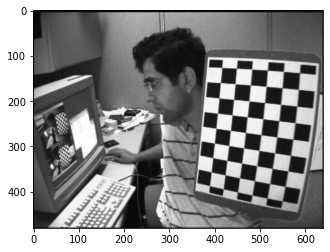

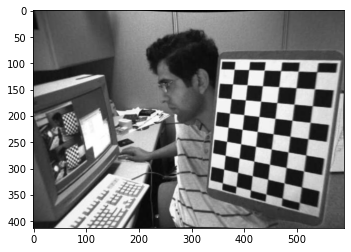

In [41]:
 # undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
plt.imshow(img)
plt.show()
plt.imshow(dst)
plt.show()


In [42]:
print("Optimal Camera matrix:") 
print(newcameramtx) 
 
print("\n Distortion coefficient:") 
print(dist) 
   
print("\n Rotation Vectors:") 
print(rvecs) 
   
print("\n Translation Vectors:") 
print(tvecs) 

Optimal Camera matrix:
[[438.77444458   0.         344.91437961]
 [  0.         431.79690552 232.9516501 ]
 [  0.           0.           1.        ]]

 Distortion coefficient:
[[-0.29800288  0.16066574  0.00158846 -0.00033622 -0.06800946]]

 Rotation Vectors:
[array([[-0.26960412],
       [-0.3931701 ],
       [-2.74684348]]), array([[-0.29944983],
       [ 0.39349381],
       [-1.43487232]]), array([[-0.38346572],
       [-0.18040299],
       [-3.11528036]]), array([[-0.43668367],
       [ 0.25612887],
       [-3.08785142]]), array([[ 0.41375338],
       [ 0.6601188 ],
       [-1.33827871]]), array([[-0.46337541],
       [-0.31169671],
       [-1.76005639]])]

 Translation Vectors:
[array([[3.07527732],
       [2.74219146],
       [9.89093015]]), array([[ 1.66653096],
       [ 3.80699267],
       [16.12454212]]), array([[ 2.86631696],
       [ 2.21987834],
       [10.95367708]]), array([[ 3.85574552],
       [ 0.89415619],
       [14.85325994]]), array([[-2.0748935 ],
       [ 1.84043